In [25]:
%pylab inline
import seaborn as sns
import pandas as pd
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import threading
import time
import logging
import random
import Queue

logging.basicConfig(filename='fun_thread.out',
                    level=logging.DEBUG,
                    format='(%(threadName)-9s) %(message)s',)

BUF_SIZE = 100
q = Queue.Queue(BUF_SIZE) # built-in wait and notify

class ProducerThread(threading.Thread):
    def __init__(self, group=None, target=None, name=None,
                 args=(), kwargs=None, verbose=None):
        super(ProducerThread,self).__init__()
        self.target = target
        self.name = name

    def run(self):
        while True:
            if not q.full():
                item = random.randint(1,10)
                q.put(item)
                logging.debug('Putting ' + str(item)
                              + ' : ' + str(q.qsize()) + ' items in queue')
                time.sleep(random.random())
        return

class ConsumerThread(threading.Thread):
    def __init__(self, group=None, target=None, name=None,
                 args=(), kwargs=None, verbose=None):
        super(ConsumerThread,self).__init__()
        self.target = target
        self.name = name
        return

    def run(self):
        while True:
            if not q.empty():
                item = q.get()
                logging.debug('Getting ' + str(item)
                              + ' : ' + str(q.qsize()) + ' items in queue')
                time.sleep(random.random())
        return

if __name__ == '__main__':

    c = [ConsumerThread(name='consumer'+str(i)) for i in range(20)]
    p = [ProducerThread(name='producer'+str(i)) for i in range(20)]

    combined = list(zip(c, p))
    combined = [_ for pair in combined for _ in pair]
    if len(c) > len(p):
        combined += c[len(p):]
    elif len(p) > len(c):
        combined += p[len(c):]

    for entity in combined:
        entity.start()
        time.sleep(0)

In [2]:
with open('fun_thread.out') as f:
    for row in f.readlines():
        print(row)
        break

(producer0) Putting 7 : 1 items in queue



In [3]:
data = []
with open('fun_thread.out') as f:
    for row in f.readlines():
        row = row.split(' ')
        data.append([row[0], row[4]])

In [4]:
data[0]

['(producer0)', '1']

In [5]:
data[-1]

['(consumer3)', '36']

In [7]:
df = pd.DataFrame(data, columns=['worker', 'queue_length'])

In [8]:
df.head()

,worker,queue_length
0,(producer0),1
1,(producer2),2
2,(producer1),3
3,(consumer3),2
4,(consumer0),1


In [16]:
running_avg = []
total = 0
for ind, l in enumerate(df.queue_length.astype('int')):
    total += l
    running_avg.append(total // (ind + 1))

In [17]:
df['running_avg'] = running_avg

In [18]:
df.head()

,worker,queue_length,running_avg
0,(producer0),1,1
1,(producer2),2,1
2,(producer1),3,2
3,(consumer3),2,2
4,(consumer0),1,1


In [19]:
df.tail()

,worker,queue_length,running_avg
51182,(consumer18),34,39
51183,(producer2),35,39
51184,(producer11),36,39
51185,(producer18),37,39
51186,(consumer3),36,39


The Queue length shifts over time

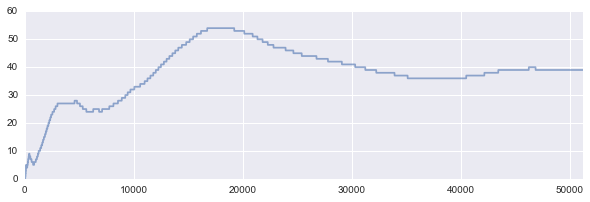

In [41]:
df.running_avg.plot(figsize=(10, 3), alpha=.6)

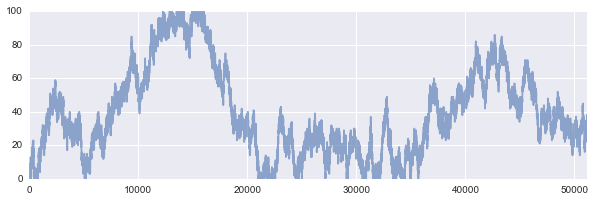

In [42]:
df.queue_length.astype('int').plot(figsize=(10, 3), alpha=.6)

In [31]:
count_df = pd.DataFrame(Counter(df.worker).items(), columns=['worker', 'count'])

Workers' loads are evenly distributed

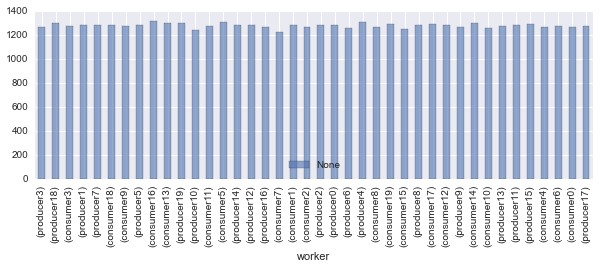

In [43]:
count_df.plot(kind='bar', y='count', x='worker', figsize=(10, 3), alpha=.6)